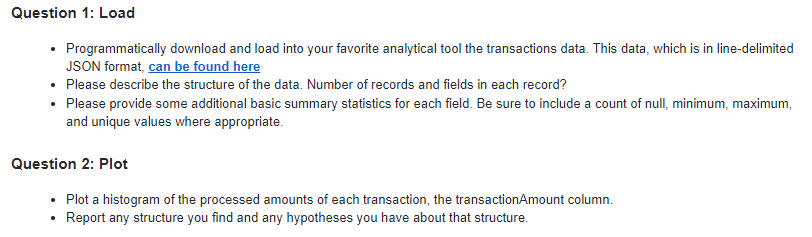

In [48]:
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
pd.options.display.max_columns = None
pd.options.display.max_rows =30
import random

In [49]:
data = pd.read_json('transactions.txt',lines=True)
data.head(3)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,01,rideshare,06/2023,2015-03-14,2015-03-14,414,414,1803,PURCHASE,,0.0,,,,False,,,False,False
1,737265056,737265056,5000,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,01,entertainment,02/2024,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.0,,,,True,,,False,False
2,737265056,737265056,5000,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.0,,,,False,,,False,False


In [50]:
print("Number of rows in data are : ",len(data),' and number of columns are ',len(data.columns))

Number of rows in data are :  786363  and number of columns are  29


### There are 786363 rows and 29 columns in the data.

In [51]:
data['transactionDateTime'] = pd.to_datetime(data['transactionDateTime'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   accountNumber             786363 non-null  int64         
 1   customerId                786363 non-null  int64         
 2   creditLimit               786363 non-null  int64         
 3   availableMoney            786363 non-null  float64       
 4   transactionDateTime       786363 non-null  datetime64[ns]
 5   transactionAmount         786363 non-null  float64       
 6   merchantName              786363 non-null  object        
 7   acqCountry                786363 non-null  object        
 8   merchantCountryCode       786363 non-null  object        
 9   posEntryMode              786363 non-null  object        
 10  posConditionCode          786363 non-null  object        
 11  merchantCategoryCode      786363 non-null  object        
 12  cu

### The data head showed some blank values in Merchant City and State column, so replacing blanks with NaN.

In [52]:
data.replace('',np.nan,inplace=True)

In [53]:
print(data.isnull().sum())

accountNumber                    0
customerId                       0
creditLimit                      0
availableMoney                   0
transactionDateTime              0
transactionAmount                0
merchantName                     0
acqCountry                    4562
merchantCountryCode            724
posEntryMode                  4054
posConditionCode               409
merchantCategoryCode             0
currentExpDate                   0
accountOpenDate                  0
dateOfLastAddressChange          0
cardCVV                          0
enteredCVV                       0
cardLast4Digits                  0
transactionType                698
echoBuffer                  786363
currentBalance                   0
merchantCity                786363
merchantState               786363
merchantZip                 786363
cardPresent                      0
posOnPremises               786363
recurringAuthInd            786363
expirationDateKeyInMatch         0
isFraud             

### Droping columns where all rows are blank/entire column is NaN

In [54]:
data.drop(['echoBuffer', 'merchantCity', 'merchantState', 'merchantZip','posOnPremises','recurringAuthInd'],axis=1,inplace=True)

### Checking if accountNumber and customerID is always same in the entire data, if yes, droping one column

In [55]:
data['col'] = np.where(data['accountNumber']==data['customerId'],'equal','not equal')
data['col'].value_counts().to_frame()

,col
equal,786363


In [56]:
data.drop(['accountNumber', 'col'],axis=1,inplace=True)

In [57]:
data['transactionDateTime'] = pd.to_datetime(data['transactionDateTime'])
data['accountOpenDate']=pd.to_datetime(data['accountOpenDate']) 
data.describe(datetime_is_numeric=True)

,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,accountOpenDate,cardCVV,enteredCVV,cardLast4Digits,currentBalance
count,7.863630e+05,786363.000000,786363.000000,786363,786363.000000,786363,786363.000000,786363.000000,786363.000000,786363.000000
mean,5.372326e+08,10759.464459,6250.725369,2016-07-06 01:58:58.395681536,136.985791,2014-02-03 01:11:17.352825856,544.467338,544.183857,4757.417799,4508.739089
min,1.000881e+08,250.000000,-1005.630000,2016-01-01 00:01:02,0.000000,1989-08-22 00:00:00,100.000000,0.000000,0.000000,0.000000
25%,3.301333e+08,5000.000000,1077.420000,2016-04-06 19:35:07,33.650000,2013-06-29 00:00:00,310.000000,310.000000,2178.000000,689.910000
50%,5.074561e+08,7500.000000,3184.860000,2016-07-08 05:03:57,87.900000,2014-09-05 00:00:00,535.000000,535.000000,4733.000000,2451.760000
75%,7.676200e+08,15000.000000,7500.000000,2016-10-05 13:52:03.500000,191.480000,2015-05-04 00:00:00,785.000000,785.000000,7338.000000,5291.095000
max,9.993896e+08,50000.000000,50000.000000,2016-12-30 23:59:45,2011.540000,2015-12-31 00:00:00,998.000000,998.000000,9998.000000,47498.810000
std,2.554211e+08,11636.174890,8880.783989,NaN,147.725569,NaN,261.524220,261.551254,2996.583810,6457.442068


### Quick Insights:
#### 1. transactionDateTime shows that data is collected between Jan 2016-Dec 2016
#### 2. more than 50% of the transactionAmount is below 100
#### 3. the oldest account in the data is almost 25 years old

In [58]:
data.columns

Index(['customerId', 'creditLimit', 'availableMoney', 'transactionDateTime',
       'transactionAmount', 'merchantName', 'acqCountry',
       'merchantCountryCode', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'currentExpDate', 'accountOpenDate',
       'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits',
       'transactionType', 'currentBalance', 'cardPresent',
       'expirationDateKeyInMatch', 'isFraud'],
      dtype='object')

In [101]:
customerId=data['customerId'].value_counts().to_frame()
print(customerId.head(10),"\n\n\n",customerId.head(10)/len(data))

           customerId
380680241       32850
882815134       13189
570884863       10867
246251253       10172
369308035        7229
724518977        6283
894938833        6101
419709514        5930
832842201        5850
208319653        5235 


            customerId
380680241    0.041775
882815134    0.016772
570884863    0.013819
246251253    0.012936
369308035    0.009193
724518977    0.007990
894938833    0.007759
419709514    0.007541
832842201    0.007439
208319653    0.006657


#### We see that customer 380680241 alone has 32k transactions, with is 4% of the entire data and so after checking if this is the oldest customer,  it's interesting to see that the account was only opened in 2014

In [108]:
data[data['customerId']==380680241][['accountOpenDate','isFraud']].value_counts()

accountOpenDate  isFraud
2014-06-21       False      32067
                 True         783
dtype: int64

In [62]:
creditLimit=data['creditLimit'].value_counts().sort_values(ascending=False).to_frame()
creditLimit

,creditLimit
5000,201863
15000,139307
7500,97913
2500,75429
20000,68629
10000,56889
50000,48781
1000,36430
250,34025
500,27097


<AxesSubplot:>

<Figure size 720x360 with 0 Axes>

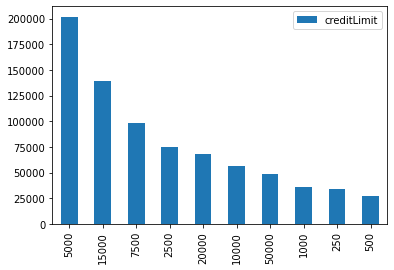

In [115]:
plt.figure(figsize=(10,5))
creditLimit.plot(kind='bar')

#### 20% of the transactions have creditLimit 5000,
#### It's interesting to see that the range of transaction Amount is the same irrespective of the credit limit

<AxesSubplot:xlabel='creditLimit', ylabel='transactionAmount'>

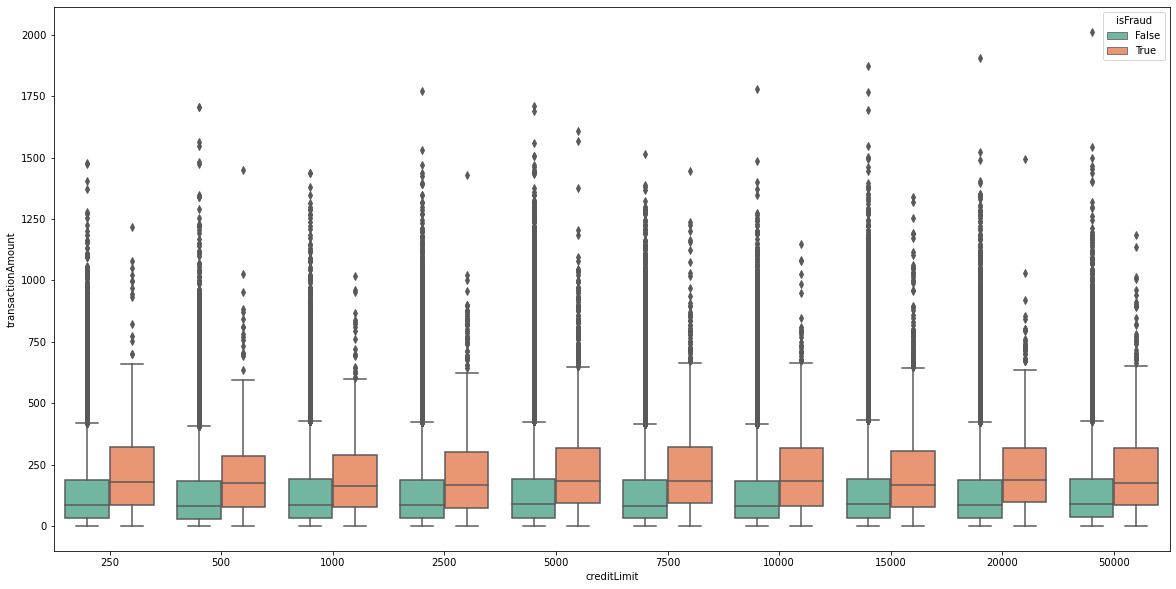

In [83]:
plt.figure(figsize=(20,10))
sns.boxplot(x = data['creditLimit'],
            y = data['transactionAmount'],
            hue = data['isFraud'],
            palette = 'Set2')

#### Linear relation between credit limit and spending

<AxesSubplot:xlabel='creditLimit', ylabel='availableMoney'>

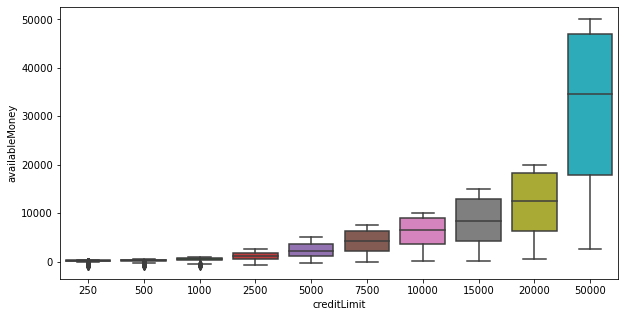

In [160]:
plt.figure(figsize=(10,5))
sns.boxplot(data=data,x='creditLimit', y='availableMoney')

In [94]:
len(data[data['transactionAmount']<100])/len(data)

0.5388249447138281

#### We see 53% of the transactions done are below $100, so checking if we see the same pattern for Fraud cases

<AxesSubplot:xlabel='transactionAmount', ylabel='Count'>

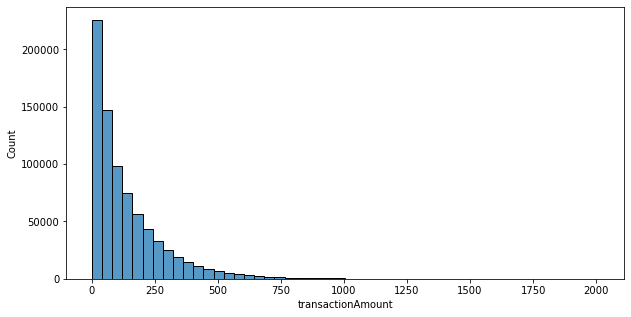

In [92]:
plt.figure(figsize=(10,5))
sns.histplot(data=data, x='transactionAmount',bins=50,stat='count')

<AxesSubplot:xlabel='transactionAmount', ylabel='Count'>

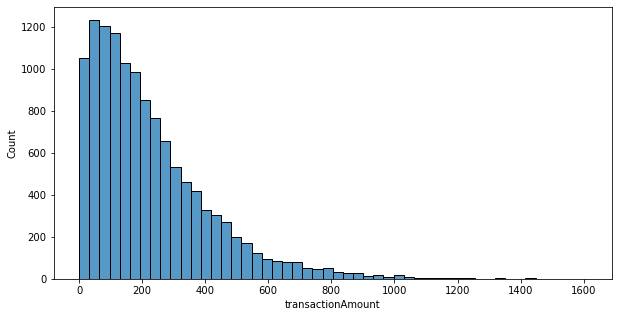

In [93]:
plt.figure(figsize=(10,5))
sns.histplot(data=data[data['isFraud']==True], x='transactionAmount',bins=50,stat='count')

<AxesSubplot:>

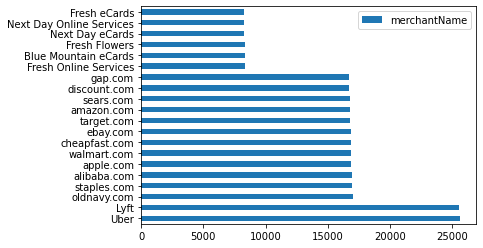

In [119]:
merchantName=data['merchantName'].value_counts().to_frame()
merchantName.head(20).plot(kind='barh')

#### By looking at Merchant Names we can see the top categories are rideshare and online shopping websites.
#### Tts interesting to see that merchantCategoryCode has fast food as the second most frequent category

In [161]:
merchantCategoryCode=data['merchantCategoryCode'].value_counts().to_frame()
merchantCategoryCode['%']=merchantCategoryCode/len(data)*100
merchantCategoryCode

,merchantCategoryCode,%
online_retail,202156,25.707720
fastfood,112138,14.260335
entertainment,80098,10.185881
food,75490,9.599892
online_gifts,66238,8.423336
rideshare,51136,6.502849
hotels,34097,4.336038
fuel,23910,3.040580
subscriptions,22901,2.912268
auto,21651,2.753309


Text(0, 0.5, '# of Transations')

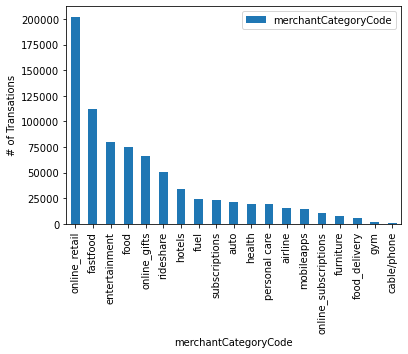

In [27]:
merchantCategoryCode.plot(kind='bar')
plt.xlabel('merchantCategoryCode')
plt.ylabel('# of Transations')

<AxesSubplot:xlabel='transactionAmount', ylabel='merchantCategoryCode'>

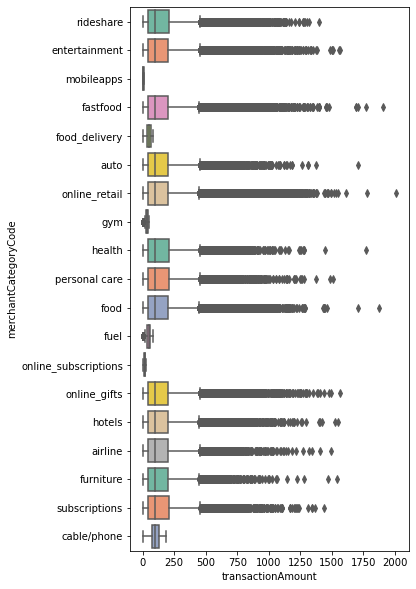

In [130]:
plt.figure(figsize=(5,10))
sns.boxplot(y = data['merchantCategoryCode'],
            x = data['transactionAmount'],
            #hue = data['isFraud'],
            palette = 'Set2')

### We see that 25% of transactions are online retail transactions but the range of transactionAmount is also large with possible outliers near 2000

### We kind of see the same trend for fraud cases except unusal high number of online_gift fraud cases

<AxesSubplot:>

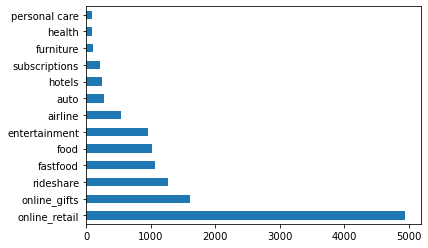

In [140]:
data[data['isFraud']==True]['merchantCategoryCode'].value_counts().plot(kind='barh')

### We see that most of the transactions are done in US for acqCountry and merchantCountryCode

In [158]:
acqCountry=data['acqCountry'].value_counts().to_frame()
acqCountry['%'] = acqCountry/len(data)*100
acqCountry


,acqCountry,%
US,774709,98.517987
MEX,3130,0.398035
CAN,2424,0.308255
PR,1538,0.195584


In [159]:
merchantCountryCode=data['merchantCountryCode'].value_counts().to_frame()
merchantCountryCode['%'] = merchantCountryCode/len(data)*100
merchantCountryCode

,merchantCountryCode,%
US,778511,99.001479
MEX,3143,0.399688
CAN,2426,0.308509
PR,1559,0.198254


## Looking at other categorical variables in the data

In [22]:
posEntryMode=data['posEntryMode'].value_counts().to_frame()
posEntryMode

,posEntryMode
05,315035
09,236481
02,195934
90,19576
80,15283


Text(0, 0.5, '# of Transations')

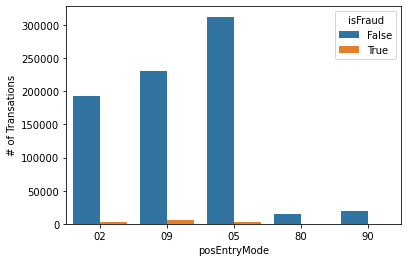

In [23]:
sns.countplot(data=data, x='posEntryMode', hue='isFraud')
plt.xlabel('posEntryMode')
plt.ylabel('# of Transations')

In [24]:
posConditionCode=data['posConditionCode'].value_counts().to_frame()
posConditionCode

,posConditionCode
01,628787
08,149634
99,7533


Text(0, 0.5, '# of Transations')

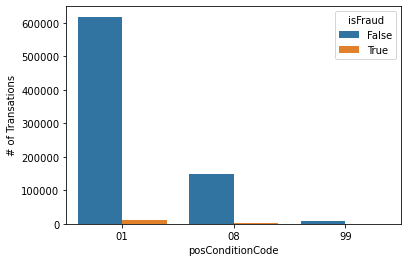

In [25]:
sns.countplot(data=data, x='posConditionCode', hue='isFraud')
plt.xlabel('posConditionCode')
plt.ylabel('# of Transations')

### Very less reversal or address_verfication cases in the data

In [135]:
transactionType=data['transactionType'].value_counts().to_frame()
transactionType['%']=transactionType/len(data)*100
transactionType

,transactionType,%
PURCHASE,745193,94.764504
REVERSAL,20303,2.581886
ADDRESS_VERIFICATION,20169,2.564846


Text(0, 0.5, '# of Transations')

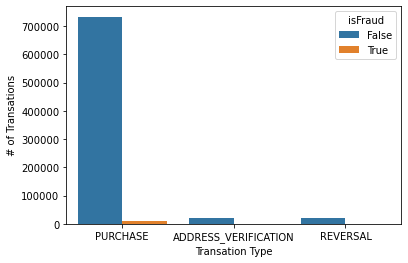

In [29]:
sns.countplot(data=data, x='transactionType', hue='isFraud')
plt.xlabel('Transation Type')
plt.ylabel('# of Transations')

In [141]:
cardPresent=data['cardPresent'].value_counts().to_frame()
cardPresent

,cardPresent
False,433495
True,352868


Text(0.5, 1.0, '# of Transations if Fraud and not Fraud when card present')

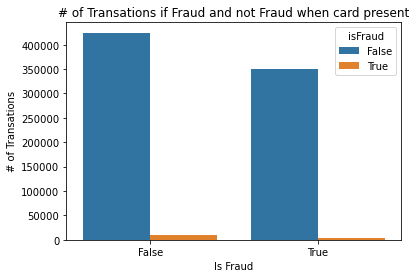

In [142]:
sns.countplot(data=data, x='cardPresent', hue='isFraud')
plt.xlabel('Is Fraud')
plt.ylabel('# of Transations')
plt.title('# of Transations if Fraud and not Fraud when card present')

In [146]:
expirationDateKeyInMatch=data[['expirationDateKeyInMatch','isFraud']].value_counts().to_frame()
expirationDateKeyInMatch

0
expirationDateKeyInMatch isFraud        
False                    False    772916
                         True      12404
True                     False      1030
                         True         13

Text(0.5, 1.0, '# of Transations if Fraud and not Fraud for expirationDateKeyInMatch')

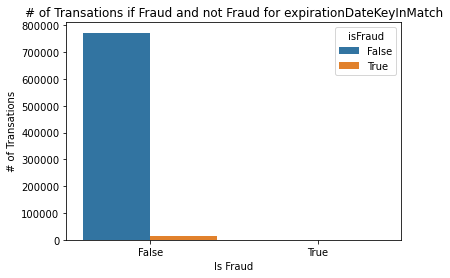

In [145]:
sns.countplot(data=data, x='expirationDateKeyInMatch', hue='isFraud')
plt.xlabel('Is Fraud')
plt.ylabel('# of Transations')
plt.title('# of Transations if Fraud and not Fraud for expirationDateKeyInMatch')

In [157]:
isFraud=data['isFraud'].value_counts().to_frame()
isFraud['%'] = isFraud/len(data)*100
isFraud

,isFraud,%
False,773946,98.420958
True,12417,1.579042


<AxesSubplot:ylabel='isFraud'>

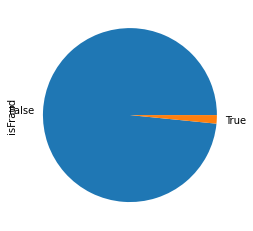

In [148]:
isFraud['isFraud'].plot(kind='pie')

### The transaction DateTime stamp can be used to get year month day information to see if there is a trend in fraud cases, but no pattern is observed

In [153]:
data['transactionMonth'] = data['transactionDateTime'].dt.month
data['transactionYear'] = data['transactionDateTime'].dt.year
data['transactionDay'] = data['transactionDateTime'].dt.day
data['transactionHour'] = data['transactionDateTime'].dt.hour

<AxesSubplot:>

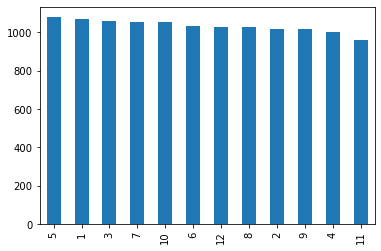

In [154]:
data[data['isFraud']==True]['transactionMonth'].value_counts().plot(kind='bar')

<AxesSubplot:>

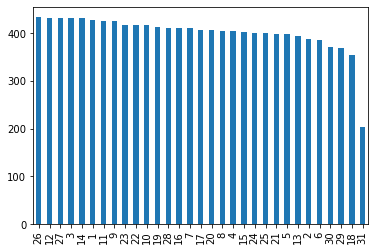

In [155]:
data[data['isFraud']==True]['transactionDay'].value_counts().plot(kind='bar')

### NaN values in the entire data and NaN values when it is a Fraud case

In [42]:
print(data.isnull().sum())

customerId                     0
creditLimit                    0
availableMoney                 0
transactionDateTime            0
transactionAmount              0
merchantName                   0
acqCountry                  4562
merchantCountryCode          724
posEntryMode                4054
posConditionCode             409
merchantCategoryCode           0
currentExpDate                 0
accountOpenDate                0
dateOfLastAddressChange        0
cardCVV                        0
enteredCVV                     0
cardLast4Digits                0
transactionType              698
currentBalance                 0
cardPresent                    0
expirationDateKeyInMatch       0
isFraud                        0
transactionMonth               0
transactionYear                0
transactionDay                 0
transactionHour                0
dtype: int64


In [43]:
print(data[data['isFraud']==True].isnull().sum())

customerId                    0
creditLimit                   0
availableMoney                0
transactionDateTime           0
transactionAmount             0
merchantName                  0
acqCountry                  149
merchantCountryCode          82
posEntryMode                269
posConditionCode             22
merchantCategoryCode          0
currentExpDate                0
accountOpenDate               0
dateOfLastAddressChange       0
cardCVV                       0
enteredCVV                    0
cardLast4Digits               0
transactionType              14
currentBalance                0
cardPresent                   0
expirationDateKeyInMatch      0
isFraud                       0
transactionMonth              0
transactionYear               0
transactionDay                0
transactionHour               0
dtype: int64


### Since the number of Fraud cases is where small, cleaning rows having null value of "Fruad=True" cases will help us in retaining those rows and then we can drop the rows having NaN values of the majority class.